In [1]:
#p2_Introductory_example_01

In [2]:
path3='usagov_bitly_data_ANSI.txt' #

In [3]:
open(path3).readline() #讀取 path 中的第一行,文件每行資料格式為JSON

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json #import json 模組

In [5]:
path3='usagov_bitly_data_ANSI.txt'

In [6]:
# use the json module and its loads function invoked on each line
# in the sample file 'usagov_bitly_data_ANSI.txt'

In [7]:
records=[json.loads(line) for line in open(path3)] # list comprehension,串列生成式
                                                   # open(path3)--> 一個可迭代物件
                                                   # 運算式 --> json.loads()  

In [8]:
records[0] #The resulting object records is now a list of Python dicts
           #list of dicts; records[0] -->串列第一個元素, offset值為0 

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [9]:
records[0].keys() #以dict.keys() method 檢視 dict records[0] 內的所有 key

dict_keys(['gr', 'nk', 'l', 'hc', 'tz', 'a', 'h', 'u', 'hh', 'c', 'r', 'g', 'll', 'cy', 'al', 't'])

In [10]:
#access individual values within records by passing a string for the key you wish to access

In [11]:
records[0]['tz'] #dict. records[0] , 以key ['tz'] 當註標(index)取值

'America/New_York'

In [12]:
print(records[0]['tz']) #列印

America/New_York


In [13]:
# extract a list of time zones again using a list comprehension

In [14]:
# 缺失值處理範例:

In [15]:
time_zones=[rec['tz'] for rec in records] #用 list conprehension 將records 中,key 為['tz'] 
                                          #的值都取出, 但在這個例子中會失敗, 因為records中並不是
                                          #每個元素(dict.)中都有key ['tz'] 

KeyError: 'tz'

In [16]:
# not all of the records have a time zone field!

In [17]:
# we can add the check if 'tz' in rec at the end of the list comprehension

In [18]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec] #list conprehension with if condition

In [19]:
time_zones[:10] #Just looking at the first 10 time zones
                #只要是sequence物件都可以用slice [start:end:step] 取值

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [20]:
#用標準python liberary 寫一計數函數 get_counts()  

In [21]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [22]:
#用標準python liberary 寫一更精簡的計數函數 get_counts2()

In [23]:
from collections import defaultdict #from collections module import defaultdic function 

In [24]:
def get_counts2(seq):
    counts=defaultdict(int)  # values will initialize to 0
    for x in seq:
        counts[x]+=1
    return counts

In [25]:
counts_1=get_counts2(time_zones) #叫用function get_counts2

In [26]:
type(counts_1) #collections.defaultdict object

collections.defaultdict

In [27]:
counts_1 #檢視 defaultdict object counts_1

defaultdict(int,
            {'': 521,
             'Africa/Cairo': 3,
             'Africa/Casablanca': 1,
             'Africa/Ceuta': 2,
             'Africa/Johannesburg': 1,
             'Africa/Lusaka': 1,
             'America/Anchorage': 5,
             'America/Argentina/Buenos_Aires': 1,
             'America/Argentina/Cordoba': 1,
             'America/Argentina/Mendoza': 1,
             'America/Bogota': 3,
             'America/Caracas': 1,
             'America/Chicago': 400,
             'America/Chihuahua': 2,
             'America/Costa_Rica': 1,
             'America/Denver': 191,
             'America/Edmonton': 6,
             'America/Guayaquil': 2,
             'America/Halifax': 4,
             'America/Indianapolis': 20,
             'America/La_Paz': 1,
             'America/Lima': 1,
             'America/Los_Angeles': 382,
             'America/Managua': 3,
             'America/Mazatlan': 1,
             'America/Mexico_City': 15,
             'America/Monte

In [28]:
counts_1['America/New_York'] #檢視 key 'America/New_York' 值

1251

In [29]:
len(time_zones)

3440

In [30]:
#If we wanted the top 10 time zones and their counts

In [31]:
def top_counts(count_dict, n=10):
    value_key_pairs=[(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:] 

In [32]:
top_counts(counts_1) #叫用top_counts() function

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [33]:
#其實不必那麼辛苦!

In [34]:
#使用python standard library collections.Counter class ,可以讓上述工作更容易

In [35]:
from collections import Counter #import collections.Counter

In [36]:
counts3=Counter(time_zones) #將time_zones轉成 Counter object

In [37]:
counts3.most_common(10) #Counter object 有 most_common() method

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [38]:
# 使用 pandas, 進階資料結構 Series, DataFrame

In [39]:
from pandas import DataFrame, Series #from package pandas 
                                     #import DataFrame, Series function

In [40]:
import pandas as pd; import numpy as np

In [41]:
frame=DataFrame(records) #叫用 DataFrame(dict object) 將records 轉成 DataFrame object

In [42]:
type(frame)

pandas.core.frame.DataFrame

In [43]:
frame #display DataFrame object 'frame'

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [44]:
frame['tz'][:10] #將frame 物件 ['tz']欄位,以slice[:10] 切前10個
                 #frame['tz'] --> Series object

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [45]:
tz_counts=frame['tz'].value_counts() #frame['tz']是一個Series object,
                                      #Series 有value_counts() method

In [46]:
tz_counts[:10] #取前10個來看

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [47]:
#利用繪圖library (matplotlib) 將這段數據生成一張圖

In [48]:
#但,在這之前我們先修補未知(空字串)及缺失(NA)
#The fillna() function can replace missing (NA) values
#and unknown(empty strings) values can be replaced by boolean array indexing:

In [49]:
clean_tz=frame['tz'].fillna('Missing')

In [50]:
clean_tz[clean_tz =='']='Unknown'

In [51]:
tz_counts=clean_tz.value_counts() #將修補過的Series以value_counts() 計數

In [52]:
tz_counts[:10] #再取前10看看, 注意 Missing  120, Unknown 521

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [53]:
#畫一張水平bar圖, 但因ipythn notebook 不直接支援 plot
#所以須 %matplotlib inline

In [54]:
%matplotlib inline

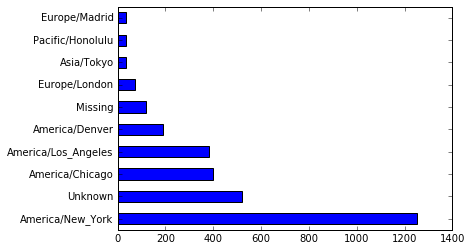

In [55]:
tz_counts[:10].plot(kind='barh',rot=0) #Series.plot() method